In [1]:
import re
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = './tweet_million.csv'

# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]

DATASET_ENCODING = "ISO-8859-1"

tweets_df = pd.read_csv(path, encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

In [3]:
tweets_df

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [4]:
# Display the first few rows of the DataFrame to understand its structure and content
print("Sample of the dataset:")
print(tweets_df.head())

Sample of the dataset:
   sentiment         ids                          date      flag  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [5]:
# Get the shape of the dataset (number of rows and columns)
print("\nShape of the dataset:")
print(tweets_df.shape)


Shape of the dataset:
(1600000, 6)


In [6]:
# Get general information about the dataset such as data types and non-null counts
print("\nInformation about the dataset:")
print(tweets_df.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


In [7]:
# Describe numerical columns to get basic statistics
print("\nStatistics of numerical columns:")
print(tweets_df.describe())


Statistics of numerical columns:
          sentiment           ids
count  1.600000e+06  1.600000e+06
mean   2.000000e+00  1.998818e+09
std    2.000001e+00  1.935761e+08
min    0.000000e+00  1.467810e+09
25%    0.000000e+00  1.956916e+09
50%    2.000000e+00  2.002102e+09
75%    4.000000e+00  2.177059e+09
max    4.000000e+00  2.329206e+09


In [8]:
# Describe categorical columns
print("\nStatistics of categorical columns:")
print(tweets_df.describe(include=['object']))


Statistics of categorical columns:
                                date      flag      user  \
count                        1600000   1600000   1600000   
unique                        774363         1    659775   
top     Mon Jun 15 12:53:14 PDT 2009  NO_QUERY  lost_dog   
freq                              20   1600000       549   

                             text  
count                     1600000  
unique                    1581466  
top     isPlayer Has Died! Sorry   
freq                          210  


In [9]:
# Count the number of unique values in each column
print("\nNumber of unique values in each column:")
print(tweets_df.nunique())


Number of unique values in each column:
sentiment          2
ids          1598315
date          774363
flag               1
user          659775
text         1581466
dtype: int64


In [10]:
# Check for missing values
print("\nNumber of missing values in each column:")
print(tweets_df.isnull().sum())


Number of missing values in each column:
sentiment    0
ids          0
date         0
flag         0
user         0
text         0
dtype: int64


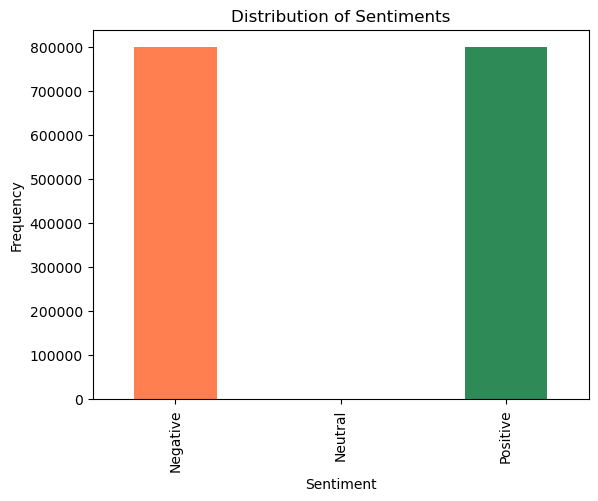

In [23]:
# Count the occurrences of each sentiment value
sentiment_counts = tweets_df['sentiment'].value_counts()

# Map sentiment labels to corresponding emotions
sentiment_labels = {0: 'Negative', 2: 'Neutral', 4: 'Positive'}

# Replace sentiment values with corresponding emotions and include all sentiments
sentiment_counts = sentiment_counts.rename(index=sentiment_labels).reindex(['Negative', 'Neutral', 'Positive'], fill_value=0)

# Plot the distribution of sentiments
sentiment_counts.plot(kind='bar', color=['coral', 'grey', 'SeaGreen'])

# Add labels and title
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')

# Show plot
plt.show()

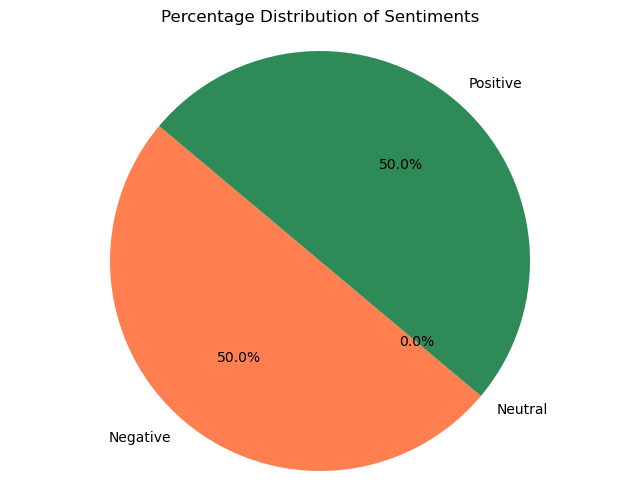

In [24]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment value
sentiment_counts = tweets_df['sentiment'].value_counts()

# Map sentiment labels to corresponding emotions
sentiment_labels = {0: 'Negative', 2: 'Neutral', 4: 'Positive'}

# Replace sentiment values with corresponding emotions and include all sentiments
sentiment_counts = sentiment_counts.rename(index=sentiment_labels).reindex(['Negative', 'Neutral', 'Positive'], fill_value=0)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['coral', 'grey', 'SeaGreen'], startangle=140)
plt.title('Percentage Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# Convert 'date' column to datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['date'])

In [28]:
# Function to plot sentiment trend over time
def plot_sentiment_over_time(tweets_df):
    plt.figure(figsize=(10, 6))
    tweets_df.groupby(tweets_df['date'].dt.date)['sentiment'].mean().plot()
    plt.title('Sentiment Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Mean Sentiment Score')
    plt.grid(True)
    plt.show()


In [26]:
# Function to plot sentiment distribution for individual users
def plot_user_sentiment_distribution(tweets_df, user):
    plt.figure(figsize=(10, 6))
    user_data = tweets_df[tweets_df['user'] == user]
    user_data['sentiment'].plot(kind='hist', bins=5, alpha=0.7)
    plt.title('Sentiment Distribution for User: {}'.format(user))
    plt.xlabel('Sentiment Score')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()



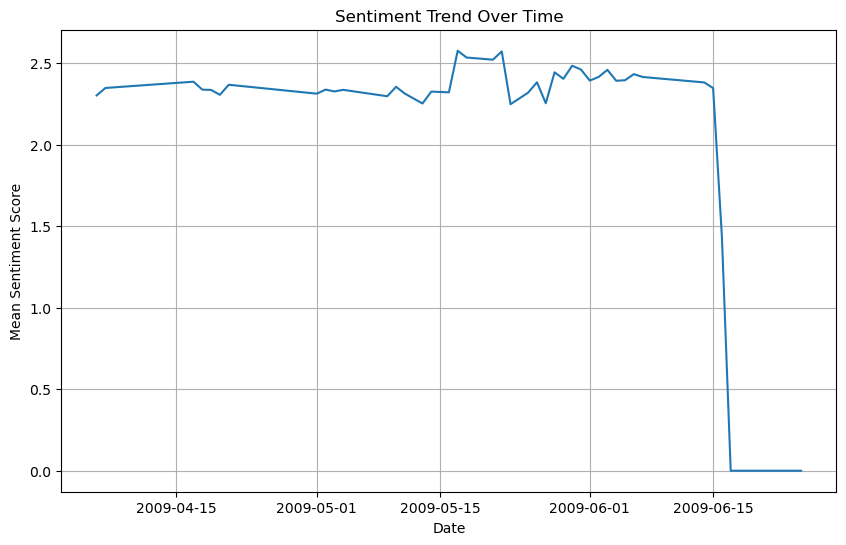

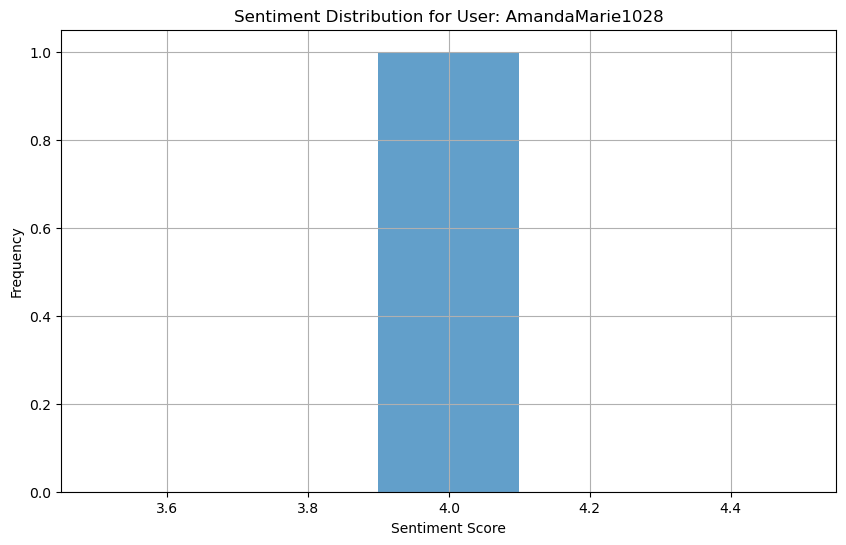

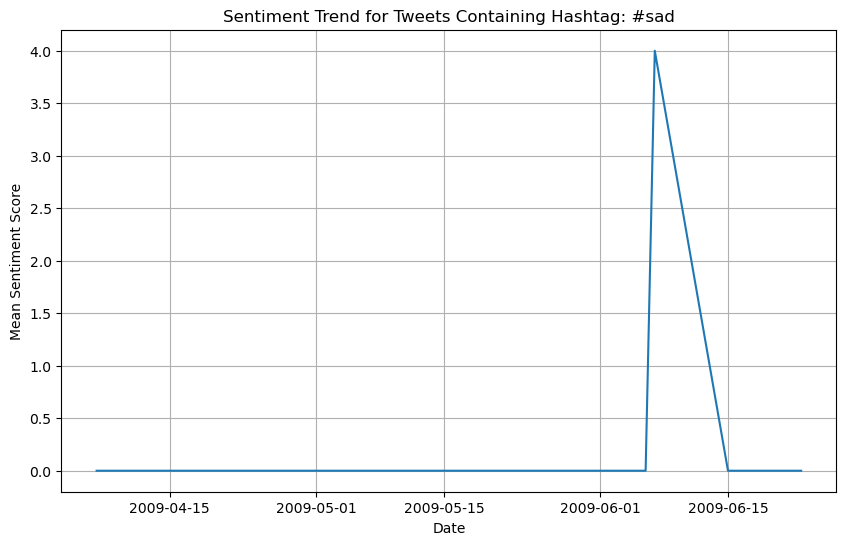

In [30]:
# Function to plot sentiment trends for tweets containing specific hashtags
def plot_hashtag_sentiment_trend(tweets_df, hashtag):
    plt.figure(figsize=(10, 6))
    hashtag_data = tweets_df[tweets_df['text'].str.contains(hashtag, case=False)]
    hashtag_data.groupby(hashtag_data['date'].dt.date)['sentiment'].mean().plot()
    plt.title('Sentiment Trend for Tweets Containing Hashtag: {}'.format(hashtag))
    plt.xlabel('Date')
    plt.ylabel('Mean Sentiment Score')
    plt.grid(True)
    plt.show()

# Example usage
plot_sentiment_over_time(tweets_df)
plot_user_sentiment_distribution(tweets_df, 'AmandaMarie1028')
plot_hashtag_sentiment_trend(tweets_df, '#sad')
